# Linear Regression

Ways of fitting a line to a set of points (samples) are here reported.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

%matplotlib inline

# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

### Mean Absolute Error

<img src="./images/02_MAE.png" alt="Drawing" style="width: 400px;"/>
 
\begin{equation*}
MAE = \frac{1}{m} \sum_{k=1}^n | y - \hat{y} |
\end{equation*}

### Mean Squared Error

<img src="./images/01_MSE.png" alt="Drawing" style="width: 400px;"/>

\begin{equation*}
MSE = \frac{1}{2m} \sum_{k=1}^n \left( y - \hat{y} \right)^2
\end{equation*}

NOTE: there is a factor 2 at the bottom to ease the calculus of its derivative - avoid a multiplication by 2.

### Mean vs Total Squared (or Absolute) Error

It doesn't really matter which one to use. Since

\begin{equation*}
MSE = \frac{1}{2m} \sum_{k=1}^n \left( y - \hat{y} \right)^2  
 while 
MSE = \frac{1}{2} \sum_{k=1}^n \left( y - \hat{y} \right)^2
\end{equation*}

\begin{equation*}
m \cdot MSE = TSE
\end{equation*}

the total squared error is just a multiple of the mean squared error. However, the gradient descent step consists of subtracting the gradient of the error times the learning rate α.

Therefore, choosing between the mean squared error and the total squared error really just amounts to picking a different learning rate. NOTE: if you use an algorithm to pick the learning rate, it will return different lr for different error functions.

### Gradient descent

Is the direction which leads to the absolute minimum (indeed, the Error function here has only one). The derivative must be calculated against all variables.

<img src="./images/00_GD.png" alt="Drawing" style="width: 600px;"/> 

\begin{equation*}
a_{i+1} = a_i - \alpha \nabla E(a_i)
\end{equation*}

Where:</br>
  * $a \in \mathbb{R}^n$ is the sample point vector
  * $E$ is the error function $\mathbb{R}^n \Rightarrow \mathbb{R}$, and must be differentiable at $a$
  * $\alpha$ is the learning rate (here, we suppose it is constant - otherwise would be $\alpha_i$ - this could happen when annealing is performed)</br>

Questions:
How should A be? Rank? Determinant? Eigenvalues? Eigenvectors?

#### Limitations
For some cases, gradient descent is relatively slow close to the minimum. For poorly conditioned convex problems, gradient descent increasingly 'zigzags' as the gradients point nearly orthogonally to the shortest direction to a minimum point.

For non-differentiable functions, gradient methods are ill-defined. Therefore we must:
use non-descent methods, (e.g. subgradient projection methods) are typically slower than gradient descent
"smooth" the function, or bound the function by a smooth function. In this approach, the smooth problem is solved in the hope that the answer is close to the answer for the non-smooth problem (occasionally, this can be made rigorous)
Mini-Batch GD
For computational limitations, data is split into mini-batches with uniform size

#### Gradent descent code

In [10]:
# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
    
    # NOTE
    # W.shape => (1,)
    # X.shape => (20,1) - it is a batch
    # y.shape => (20,)
    # type(b) => int
    
    # np.matmul takes two arguments (X,Y) 
    # where shapes are [(m,k),(k,n)] and returns a [(m,n)]
    # 
    # suppose you have two vectors:
    # 
    # case A: (m,1),(1,n)
    # all as above
    #
    # case B: (m,1),(1,)  
    # Y.shape = (1,) => second ardument is one object
    # Y is broadcasted as (1,1) by prepending a 1
    # matmul(X,Y).shape = (m,)
    
    #shapes summary: (20,1) x (1,) => (20,)
    # input shapes: (20,1) x (1,) 
    # oper. shapes: (20,1) x (1,1) => (20,1)
    # output shape: (20,1) => (20,)
    y_pred = np.matmul(X,W) + b
    error = y - y_pred
    
    # update w_1
    # 
    # W = W -grad(E(X))
    # where error function E(X) = y - F(X)
    # and grad(E(X)) = E(X) x X
    # 
    # shapes summary: (20,) x (20,) => (1,)
    # input shapes: (20,) x (20,) 
    # oper. shapes: (1,20) x (20,1) => (1,1)  --prepend,append rule: https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html
    # output shape: (1,1) => (1,)
    W_new = W + np.matmul(error, X) * learn_rate
    
    # update w_2
    # 
    # b = b - sum(error)
    # 
    # shapes summary: sum(20,) => (1,) => int
    # 
    b_new = b + sum(error) * learn_rate
    
    return W_new,b_new#W_new, b_new

#### Batch

In [ ]:
# The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

#### Run Code

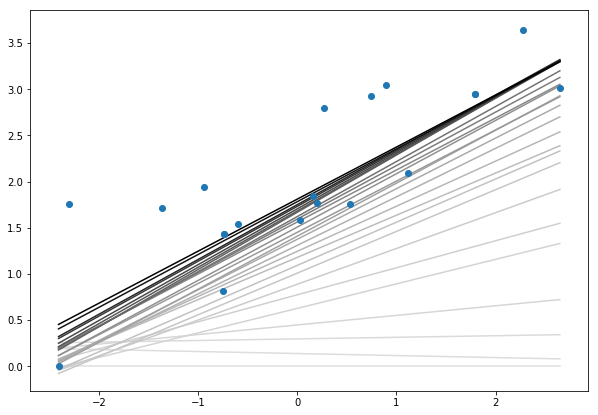

In [11]:
X = np.array([[-0.60116],[-0.94159],[-0.74565],[ 0.89583],[ 2.277  ],[-1.36115],[ 1.11943],[ 0.5336 ],[ 1.79466],[ 1.79466],[-0.73591],[ 0.20174],[ 0.03256],[ 2.64837],[ 0.74678],[ 0.26851],[-2.40724],[-0.73591],[ 0.16278],[-2.29674]])
y = np.array([ 1.54254e+00,  1.94500e+00,  8.11940e-01,  3.04041e+00,  3.63838e+00,
               1.70969e+00,  2.08990e+00,  1.75136e+00,  2.95265e+00,  2.95265e+00,
               1.43076e+00,  1.76894e+00,  1.58565e+00,  3.01665e+00,  2.92253e+00,
               2.79202e+00, -1.56000e-03,  1.43076e+00,  1.84746e+00,  1.75695e+00])

#store all the regression coefficients in an array
regression_coef = miniBatchGD(X, y)

# plot the results
plt.figure(figsize=(10,7))
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()